In [19]:
import tensorflow as tf
from tensorflow.keras import layers
import pickle
import matplotlib.pyplot as plt

In [20]:
def confusionMatrix(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [21]:
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    details = tf.config.experimental.get_device_details(gpus[0])
    print("GPU details: ", details)

with open('Data/processedData.pkl', 'rb') as f:
    data = pickle.load(f)
    labels = pickle.load(f)

with open('Data/modelParams.pkl', 'rb') as f:
    numClasses = pickle.load(f)
    dictClasses = pickle.load(f)
    minPoint = pickle.load(f)
    maxPoint = pickle.load(f)
    confidence = pickle.load(f)
    threshold = pickle.load(f)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [22]:
def compileModel(model):
    earlyStopping = tf.keras.callbacks.EarlyStopping(
        monitor='loss', 
        patience=3
    )

    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )

    history = model.fit(
        data, 
        labels, 
        epochs=25, 
        batch_size=32, 
        callbacks=[earlyStopping],
        validation_split=0.2
    )

    confusionMatrix(history)
    model.summary()

    return model

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.3494 - loss: 2.4203 - val_accuracy: 0.7005 - val_loss: 1.0071
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7521 - loss: 0.8144 - val_accuracy: 0.8358 - val_loss: 0.5475
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8370 - loss: 0.5180 - val_accuracy: 0.8510 - val_loss: 0.4868
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8708 - loss: 0.4077 - val_accuracy: 0.8610 - val_loss: 0.4487
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8869 - loss: 0.3529 - val_accuracy: 0.8939 - val_loss: 0.3261
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9028 - loss: 0.3044 - val_accuracy: 0.9116 - val_loss: 0.2786
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9098 - loss: 0.2788 - val_accuracy: 0.8905 - val_loss: 0.3381
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9128 - loss: 0

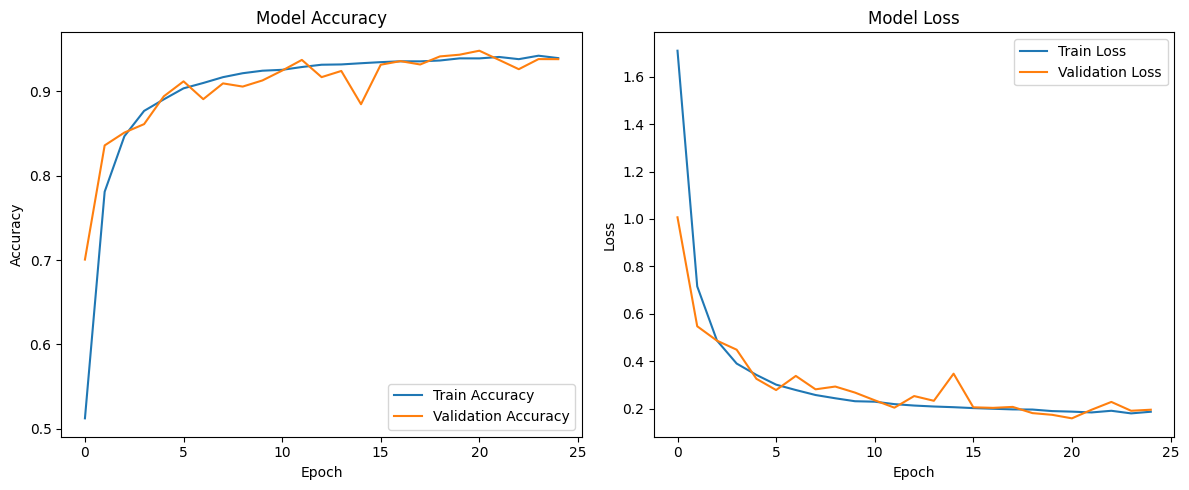

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,482 (2.52 MB)

 Trainable params: 220,160 (860.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 440,322 (1.68 MB)

In [23]:
baseModel = tf.keras.Sequential()
baseModel.add(layers.Input(shape=(data.shape[1],)))
baseModel.add(layers.Dense(512, activation='tanh'))
baseModel.add(layers.Dense(256, activation='tanh'))
baseModel.add(layers.Dense(128, activation='tanh'))
baseModel.add(layers.Dense(64, activation='tanh'))
baseModel.add(layers.Dense(numClasses, activation='softmax'))

baseModel = compileModel(baseModel)
baseModel.save('Models/baseModel.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.2697 - loss: 2.6901 - val_accuracy: 0.5544 - val_loss: 1.4524
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5546 - loss: 1.4420 - val_accuracy: 0.7021 - val_loss: 0.9574
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6460 - loss: 1.1284 - val_accuracy: 0.7482 - val_loss: 0.7826
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6901 - loss: 0.9845 - val_accuracy: 0.7883 - val_loss: 0.6682
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7144 - loss: 0.9029 - val_accuracy: 0.8101 - val_loss: 0.5950
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7376 - loss: 0.8394 - val_accuracy: 0.8365 - val_loss: 0.5229
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7514 - loss: 0.7954 - val_accuracy: 0.8408 - val_loss: 0.5124
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7607 - loss: 0

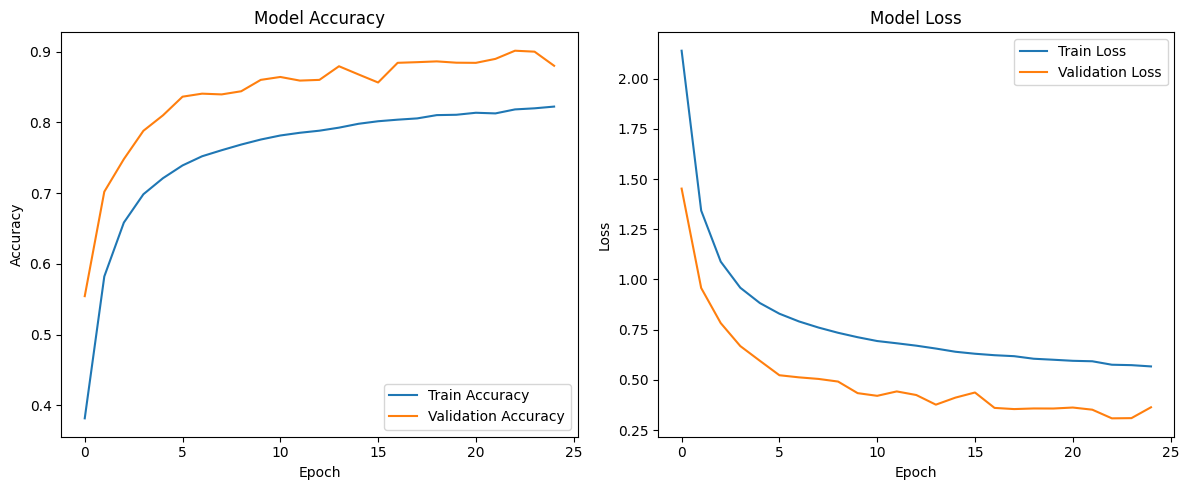

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,482 (2.52 MB)

 Trainable params: 220,160 (860.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 440,322 (1.68 MB)

In [24]:
modelDropout = tf.keras.Sequential()
modelDropout.add(layers.Input(shape=(data.shape[1],)))
modelDropout.add(layers.Dense(512, activation='tanh'))
modelDropout.add(layers.Dropout(0.1))
modelDropout.add(layers.Dense(256, activation='tanh'))
modelDropout.add(layers.Dropout(0.1))
modelDropout.add(layers.Dense(128, activation='tanh'))
modelDropout.add(layers.Dropout(0.1))
modelDropout.add(layers.Dense(64, activation='tanh'))
modelDropout.add(layers.Dropout(0.1))
modelDropout.add(layers.Dense(numClasses, activation='softmax'))

modelDropout = compileModel(modelDropout)
modelDropout.save('Models/modelDropout.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.2116 - loss: 2.9347 - val_accuracy: 0.4927 - val_loss: 1.6684
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.4478 - loss: 1.8074 - val_accuracy: 0.6205 - val_loss: 1.2303
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5306 - loss: 1.5308 - val_accuracy: 0.6754 - val_loss: 1.0371
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5762 - loss: 1.3791 - val_accuracy: 0.6940 - val_loss: 0.9732
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.6016 - loss: 1.3022 - val_accuracy: 0.7415 - val_loss: 0.8389
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6226 - loss: 1.2299 - val_accuracy: 0.7512 - val_loss: 0.7976
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6359 - loss: 1.1843 - val_accuracy: 0.7576 - val_loss: 0.7705
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.6455 - loss: 1

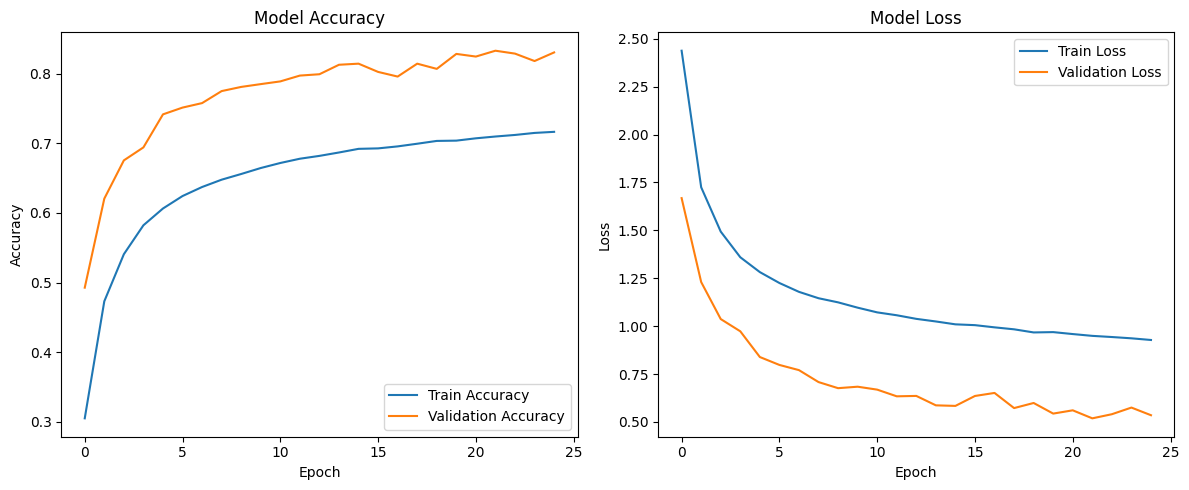

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,482 (2.52 MB)

 Trainable params: 220,160 (860.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 440,322 (1.68 MB)

In [26]:
modelDropoutV2 = tf.keras.Sequential()
modelDropoutV2.add(layers.Input(shape=(data.shape[1],)))
modelDropoutV2.add(layers.Dense(512, activation='tanh'))
modelDropoutV2.add(layers.Dropout(0.2))
modelDropoutV2.add(layers.Dense(256, activation='tanh'))
modelDropoutV2.add(layers.Dropout(0.2))
modelDropoutV2.add(layers.Dense(128, activation='tanh'))
modelDropoutV2.add(layers.Dropout(0.2))
modelDropoutV2.add(layers.Dense(64, activation='tanh'))
modelDropoutV2.add(layers.Dropout(0.2))
modelDropoutV2.add(layers.Dense(numClasses, activation='softmax'))

modelDropoutV2 = compileModel(modelDropoutV2)
modelDropoutV2.save('Models/modelDropoutV2.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2467 - loss: 2.7862 - val_accuracy: 0.4891 - val_loss: 1.6210
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.4960 - loss: 1.6293 - val_accuracy: 0.6126 - val_loss: 1.2390
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5750 - loss: 1.3601 - val_accuracy: 0.6958 - val_loss: 0.9731
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6223 - loss: 1.2039 - val_accuracy: 0.7289 - val_loss: 0.8458
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6503 - loss: 1.1095 - val_accuracy: 0.7650 - val_loss: 0.7376
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6731 - loss: 1.0449 - val_accuracy: 0.7829 - val_loss: 0.6899
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6869 - loss: 0.9950 - val_accuracy: 0.7925 - val_loss: 0.6411
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7002 - loss: 0

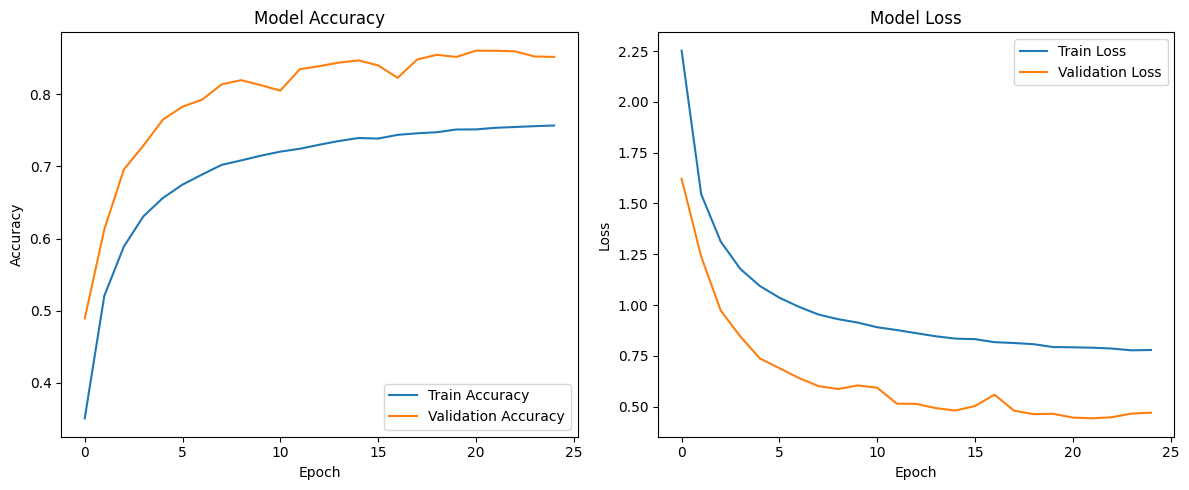

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 660,482 (2.52 MB)

 Trainable params: 220,160 (860.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 440,322 (1.68 MB)

In [27]:
modelDropoutV3 = tf.keras.Sequential()
modelDropoutV3.add(layers.Input(shape=(data.shape[1],)))
modelDropoutV3.add(layers.Dense(512, activation='tanh'))
modelDropoutV3.add(layers.Dropout(0.2))
modelDropoutV3.add(layers.Dense(256, activation='tanh'))
modelDropoutV3.add(layers.Dropout(0.2))
modelDropoutV3.add(layers.Dense(128, activation='tanh'))
modelDropoutV3.add(layers.Dropout(0.1))
modelDropoutV3.add(layers.Dense(64, activation='tanh'))
modelDropoutV3.add(layers.Dropout(0.1))
modelDropoutV3.add(layers.Dense(numClasses, activation='softmax'))

modelDropoutV3 = compileModel(modelDropoutV3)
modelDropoutV3.save('Models/modelDropoutV3.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4551 - loss: 1.9673 - val_accuracy: 0.7892 - val_loss: 0.6725
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7840 - loss: 0.6702 - val_accuracy: 0.8566 - val_loss: 0.4425
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8416 - loss: 0.4799 - val_accuracy: 0.8849 - val_loss: 0.3725
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8697 - loss: 0.3928 - val_accuracy: 0.8397 - val_loss: 0.5067
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8896 - loss: 0.3364 - val_accuracy: 0.9026 - val_loss: 0.2774
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9011 - loss: 0.2943 - val_accuracy: 0.8993 - val_loss: 0.3022
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9100 - loss: 0.2672 - val_accuracy: 0.8393 - val_loss: 0.5336
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9169 - loss: 0

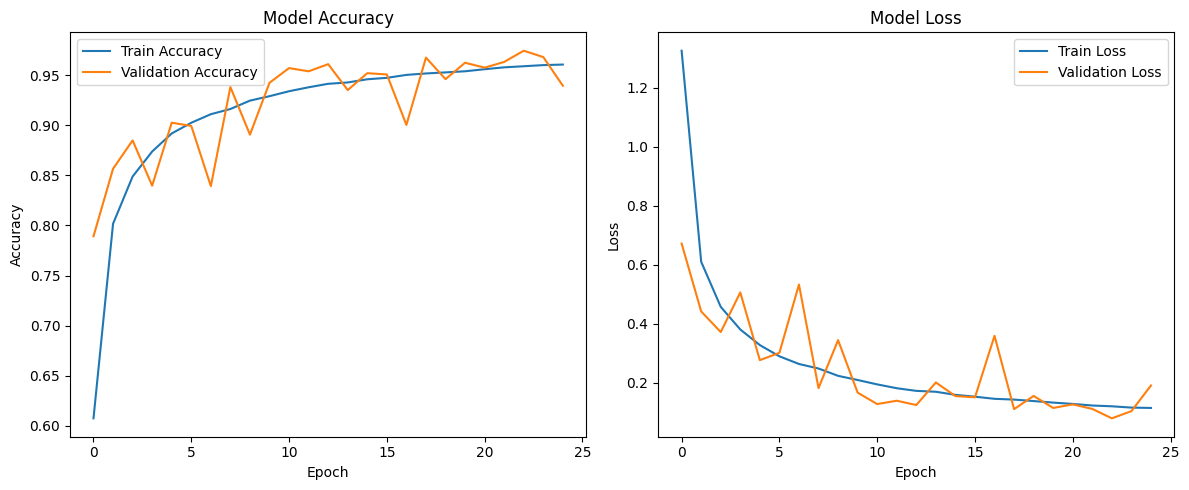

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 668,162 (2.55 MB)

 Trainable params: 222,080 (867.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 444,162 (1.69 MB)

In [28]:
modelBN = tf.keras.Sequential()
modelBN.add(layers.Input(shape=(data.shape[1],)))
modelBN.add(layers.Dense(512, activation='relu'))
modelBN.add(layers.BatchNormalization())
modelBN.add(layers.Dense(256, activation='relu'))
modelBN.add(layers.BatchNormalization())
modelBN.add(layers.Dense(128, activation='relu'))
modelBN.add(layers.BatchNormalization())
modelBN.add(layers.Dense(64, activation='relu'))
modelBN.add(layers.BatchNormalization())
modelBN.add(layers.Dense(numClasses, activation='softmax'))

modelBN = compileModel(modelBN)
modelBN.save('Models/modelBN.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2545 - loss: 2.7779 - val_accuracy: 0.6226 - val_loss: 1.1882
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5494 - loss: 1.4932 - val_accuracy: 0.7290 - val_loss: 0.8381
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6264 - loss: 1.2180 - val_accuracy: 0.7496 - val_loss: 0.7818
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6580 - loss: 1.1077 - val_accuracy: 0.7783 - val_loss: 0.7032
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6815 - loss: 1.0286 - val_accuracy: 0.8087 - val_loss: 0.6007
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7037 - loss: 0.9496 - val_accuracy: 0.8096 - val_loss: 0.5886
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7171 - loss: 0.9075 - val_accuracy: 0.8042 - val_loss: 0.5830
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7365 - loss: 0

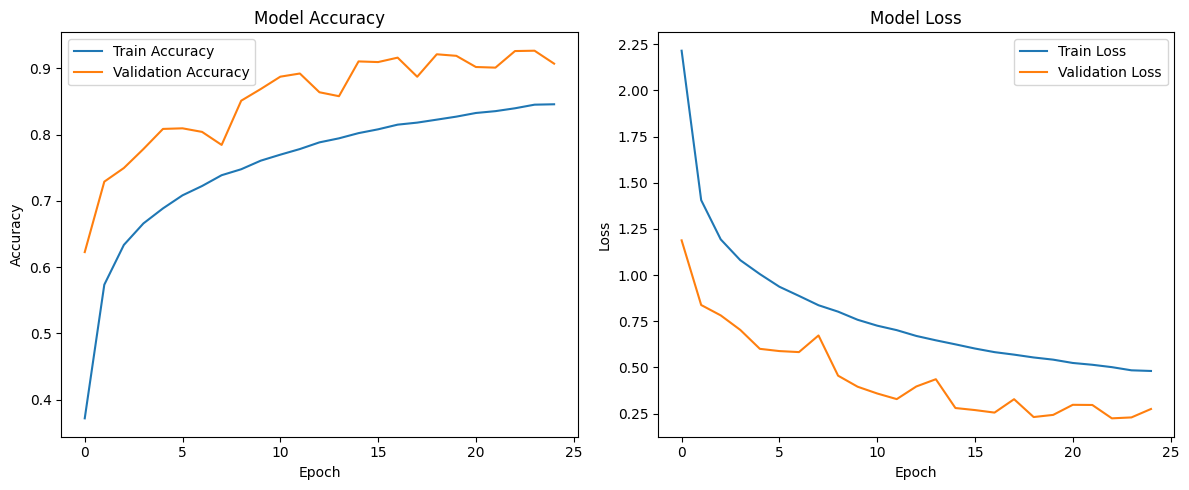

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 668,162 (2.55 MB)

 Trainable params: 222,080 (867.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 444,162 (1.69 MB)

In [29]:
modelDropoutBN = tf.keras.Sequential()
modelDropoutBN.add(layers.Input(shape=(data.shape[1],)))
modelDropoutBN.add(layers.Dense(512, activation='tanh'))
modelDropoutBN.add(layers.BatchNormalization())
modelDropoutBN.add(layers.Dropout(0.2))
modelDropoutBN.add(layers.Dense(256, activation='tanh'))
modelDropoutBN.add(layers.BatchNormalization())
modelDropoutBN.add(layers.Dropout(0.2))
modelDropoutBN.add(layers.Dense(128, activation='tanh'))
modelDropoutBN.add(layers.BatchNormalization())
modelDropoutBN.add(layers.Dropout(0.1))
modelDropoutBN.add(layers.Dense(64, activation='tanh'))
modelDropoutBN.add(layers.BatchNormalization())
modelDropoutBN.add(layers.Dropout(0.1))
modelDropoutBN.add(layers.Dense(numClasses, activation='softmax'))

modelDropoutBN = compileModel(modelDropoutBN)
modelDropoutBN.save('Models/modelDropoutBN.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.2827 - loss: 2.6733 - val_accuracy: 0.6568 - val_loss: 1.1128
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5999 - loss: 1.3137 - val_accuracy: 0.7357 - val_loss: 0.8370
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.6709 - loss: 1.0640 - val_accuracy: 0.8040 - val_loss: 0.6324
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7051 - loss: 0.9457 - val_accuracy: 0.8258 - val_loss: 0.5667
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7359 - loss: 0.8513 - val_accuracy: 0.8248 - val_loss: 0.5418
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7566 - loss: 0.7862 - val_accuracy: 0.8567 - val_loss: 0.4658
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7693 - loss: 0.7315 - val_accuracy: 0.8599 - val_loss: 0.4218
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7830 - loss: 0

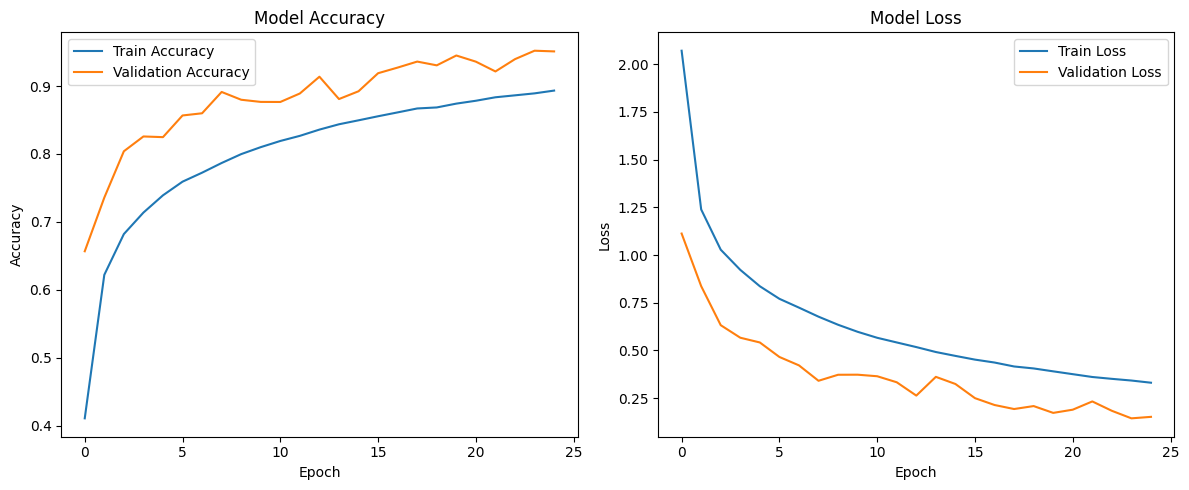

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 512)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 668,162 (2.55 MB)

 Trainable params: 222,080 (867.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 444,162 (1.69 MB)

In [33]:
modelDropoutBNV2 = tf.keras.Sequential()
modelDropoutBNV2.add(layers.Input(shape=(data.shape[1],)))
modelDropoutBNV2.add(layers.Dense(512, activation='tanh'))
modelDropoutBNV2.add(layers.BatchNormalization())
modelDropoutBNV2.add(layers.Dropout(0.1))
modelDropoutBNV2.add(layers.Dense(256, activation='tanh'))
modelDropoutBNV2.add(layers.BatchNormalization())
modelDropoutBNV2.add(layers.Dropout(0.1))
modelDropoutBNV2.add(layers.Dense(128, activation='tanh'))
modelDropoutBNV2.add(layers.BatchNormalization())
modelDropoutBNV2.add(layers.Dropout(0.1))
modelDropoutBNV2.add(layers.Dense(64, activation='tanh'))
modelDropoutBNV2.add(layers.BatchNormalization())
modelDropoutBNV2.add(layers.Dropout(0.1))
modelDropoutBNV2.add(layers.Dense(numClasses, activation='softmax'))

modelDropoutBNV2 = compileModel(modelDropoutBNV2)
modelDropoutBNV2.save('Models/modelDropoutBNV2.keras')

Epoch 1/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - accuracy: 0.2977 - loss: 2.5359 - val_accuracy: 0.5149 - val_loss: 1.5062
Epoch 2/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - accuracy: 0.6060 - loss: 1.2478 - val_accuracy: 0.6288 - val_loss: 1.1756
Epoch 3/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.6816 - loss: 0.9885 - val_accuracy: 0.7024 - val_loss: 0.9454
Epoch 4/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7181 - loss: 0.8713 - val_accuracy: 0.6992 - val_loss: 0.9317
Epoch 5/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 51s 10ms/step - accuracy: 0.7364 - loss: 0.8040 - val_accuracy: 0.7598 - val_loss: 0.7477
Epoch 6/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7518 - loss: 0.7563 - val_accuracy: 0.7265 - val_loss: 0.8376
Epoch 7/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 53s 10ms/step - accuracy: 0.7623 - loss: 0.7213 - val_accuracy: 0.7472 - val_loss: 0.7962
Epoch 8/25
5196/5196 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.7686 -

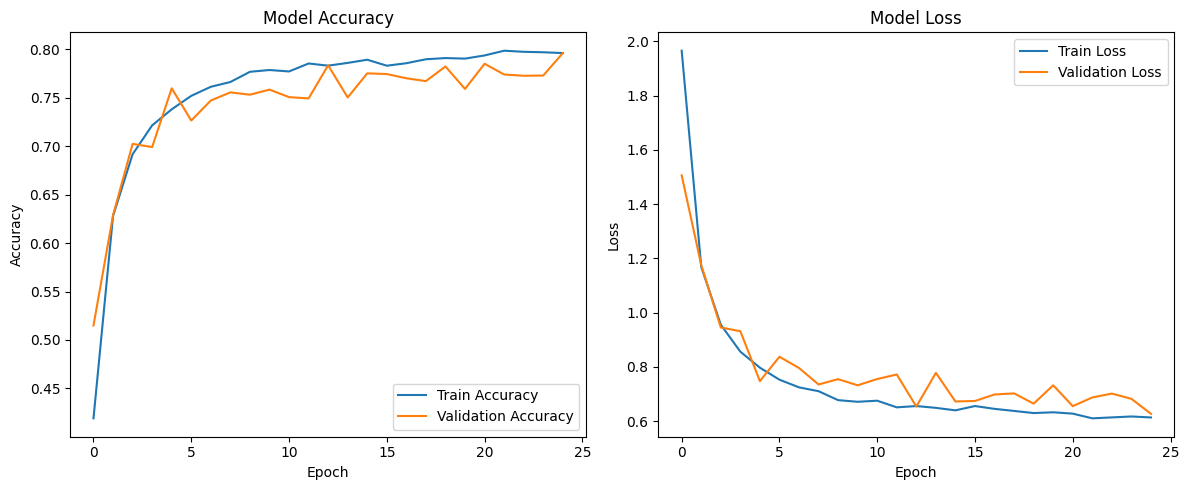

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 2048)           │       174,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,921,090 (34.03 MB)

 Trainable params: 2,973,696 (11.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,947,394 (22.69 MB)

In [30]:
modelComplex = tf.keras.Sequential()
modelComplex.add(layers.Input(shape=(data.shape[1],)))
modelComplex.add(layers.Dense(2048, activation='tanh'))
modelComplex.add(layers.Dense(1024, activation='tanh'))
modelComplex.add(layers.Dense(512, activation='tanh'))
modelComplex.add(layers.Dense(256, activation='tanh'))
modelComplex.add(layers.Dense(128, activation='tanh'))
modelComplex.add(layers.Dense(64, activation='tanh'))
modelComplex.add(layers.Dense(numClasses, activation='softmax'))

modelComplex = compileModel(modelComplex)
modelComplex.save('Models/modelComplex.keras')

In [34]:
from tensorflow.keras.utils import plot_model

models = {
    'baseModel': baseModel,
    'modelDropout': modelDropout,
    'modelDropoutV2': modelDropoutV2,
    'modelDropoutV3': modelDropoutV3,
    'modelBN': modelBN,
    'modelDropoutBN': modelDropoutBN,
    'modelDropoutBNV2': modelDropoutBNV2,
    'modelComplex': modelComplex
}

for name, model in models.items():
    plot_model(model, to_file=f'Models/{name}.png', show_shapes=True, show_layer_names=True)